In [3]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [4]:
matrix = pd.read_csv("latent_matrix_large_2.csv")
matrix = matrix.dropna()
matrix

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,movieId,avg_rating,round_rate
0,0.006463,0.077626,0.042444,0.056723,0.019568,0.108151,0.143160,0.085319,0.071131,0.331096,...,0.006443,0.014184,0.115730,0.000000,0.008385,0.019454,0.011949,10.0,3.425768,3.5
1,0.000000,0.016133,0.016189,0.059120,0.023053,0.004526,0.089986,0.007419,0.048281,0.091512,...,0.000000,0.180317,0.062896,0.056971,0.005544,0.000000,0.122863,20.0,2.878885,3.0
2,0.040625,0.124547,0.054589,0.047357,0.109706,0.148447,0.000000,0.234409,0.028487,0.081938,...,0.023125,0.000000,0.090328,0.000000,0.010595,0.045532,0.205269,30.0,3.623054,3.5
3,0.057510,0.277284,0.058808,0.000000,0.031447,0.195656,0.001640,0.443516,0.000000,0.000000,...,0.039754,0.000000,0.000000,0.102636,0.086807,0.137478,0.113751,40.0,3.610570,3.5
4,0.061471,0.030437,0.034991,0.088412,0.026785,0.101536,0.066527,0.160834,0.000767,0.046620,...,0.066544,0.040969,0.094276,0.000000,0.013441,0.000000,0.174191,50.0,4.292825,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20226,0.000000,0.006031,0.000000,0.045701,0.000000,0.000000,0.290529,0.000000,0.000000,0.217052,...,0.020934,0.478920,0.076755,0.000000,0.000000,0.008766,0.045284,184493.0,2.333333,2.5
20227,0.027982,0.014903,0.008775,0.020217,0.050619,0.063133,0.009905,0.017637,0.007657,0.000000,...,0.013452,0.000000,0.046936,0.047105,0.044041,0.025381,0.081907,184503.0,1.416667,1.5
20228,0.065133,0.000000,0.016335,0.014432,0.039699,0.042476,0.048074,0.122263,0.119475,0.132438,...,0.032566,0.220669,0.005135,0.110349,0.008100,0.019388,0.017724,184513.0,2.250000,2.0
20229,0.005955,0.043081,0.000000,0.020224,0.015337,0.017951,0.015738,0.063040,0.000000,0.010716,...,0.000000,0.079818,0.000000,0.000000,0.006854,0.002109,0.019969,184533.0,1.000000,1.0


In [5]:
matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20231 entries, 0 to 20230
Columns: 253 entries, 0 to round_rate
dtypes: float64(253)
memory usage: 39.2 MB


In [6]:
pca = PCA(n_components=10)
feat_cols = np.arange(150)

feat_cols = np.arange(150)
f = [str(i) for i in feat_cols]
pca_result = pca.fit_transform(matrix[f].values)

matrix['pca-one'] = pca_result[:,0]
matrix['pca-two'] = pca_result[:,1] 
matrix['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.11491233 0.06730723 0.04598909 0.0413553  0.03923419 0.03527141
 0.02938198 0.02330317 0.02114213 0.02035522]


Text(0.5, 1.0, '2D Round Ratings on Movies')

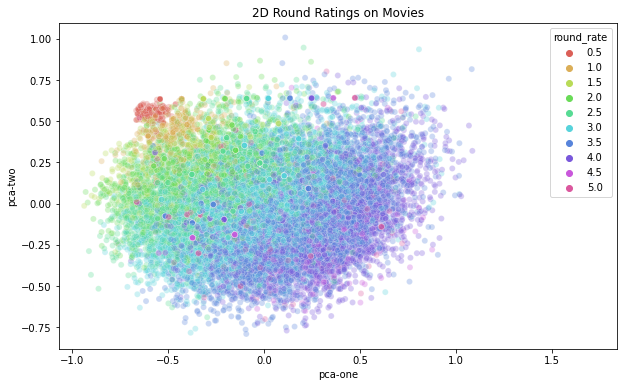

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue = 'round_rate',
    palette = sns.color_palette("hls", 10),
    data = matrix,
    legend = "full",
    alpha = 0.3
)

plt.title('2D Round Ratings on Movies')

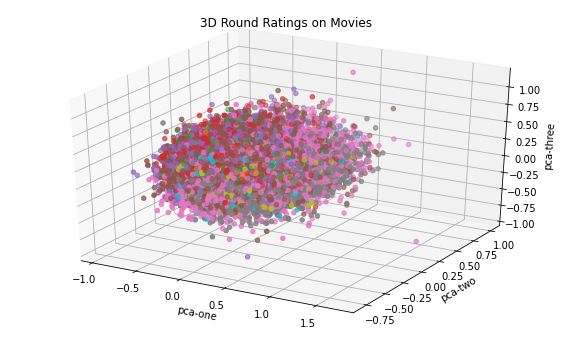

In [10]:
ax = plt.figure(figsize=(10,6)).gca(projection='3d')
ax.scatter(
    xs=matrix["pca-one"], 
    ys=matrix["pca-two"], 
    zs=matrix["pca-three"], 
    c=matrix["round_rate"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.title('3D Round Ratings on Movies')
plt.show()

In [9]:
import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

feat_cols = np.arange(150)
f = [str(i) for i in feat_cols]
tsne_results = tsne.fit_transform(matrix[f].values)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 20231 samples in 0.004s...
[t-SNE] Computed neighbors for 20231 samples in 14.848s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20231
[t-SNE] Computed conditional probabilities for sample 2000 / 20231
[t-SNE] Computed conditional probabilities for sample 3000 / 20231
[t-SNE] Computed conditional probabilities for sample 4000 / 20231
[t-SNE] Computed conditional probabilities for sample 5000 / 20231
[t-SNE] Computed conditional probabilities for sample 6000 / 20231
[t-SNE] Computed conditional probabilities for sample 7000 / 20231
[t-SNE] Computed conditional probabilities for sample 8000 / 20231
[t-SNE] Computed conditional probabilities for sample 9000 / 20231
[t-SNE] Computed conditional probabilities for sample 10000 / 20231
[t-SNE] Computed conditional probabilities for sample 11000 / 20231
[t-SNE] Computed conditional probabilities for sample 12000 / 20231
[t-SNE] Computed conditional probabilities for s

Text(0.5, 1.0, 't-SNE of round rating on Movies')

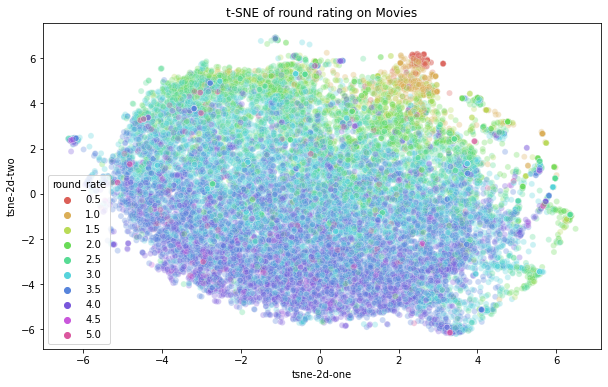

In [11]:
matrix['tsne-2d-one'] = tsne_results[:,0]
matrix['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="round_rate",
    palette=sns.color_palette("hls", 10),
    data=matrix,
    legend="full",
    alpha=0.3
)
plt.title('t-SNE of round rating on Movies')

#t-SNE figure may be different when rerun the previous chunk

In [15]:
pred_merge = pd.read_csv("pred_merge.csv")

dict = {}

for i in range(0, len(pred_merge)):
  for j in range(0, len(pred_merge.genres[i].split('|'))):
    if pred_merge.genres[i].split('|')[j] not in dict:
      dict.setdefault(pred_merge.genres[i].split('|')[j], 1)
    else:
      dict[pred_merge.genres[i].split('|')[j]] +=1

print(dict)

{'(no genres listed)': 1, 'Horror': 196, 'Animation': 439, 'Children': 404, 'Comedy': 1494, 'Musical': 187, 'Documentary': 70, 'Fantasy': 677, 'Sci-Fi': 1101, 'Drama': 1894, 'Romance': 407, 'War': 357, 'Western': 28, 'Action': 1423, 'Adventure': 1367, 'Thriller': 1031, 'Crime': 1056, 'Mystery': 409, 'IMAX': 174, 'Film-Noir': 65}


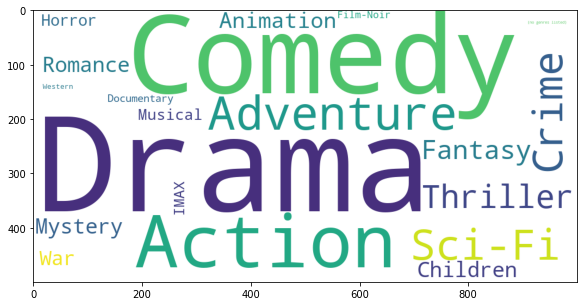

In [16]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color="white",width=1000,height=500, max_words=100,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict)
plt.figure(figsize=(10,5))
plt.imshow(wc)

In [17]:
pred_merge_2 = pd.read_csv("pred_merge_2.csv")

dict2 = {}

for i in range(0, len(pred_merge_2)):
  for j in range(0, len(pred_merge_2.genres[i].split('|'))):
    if pred_merge_2.genres[i].split('|')[j] not in dict2:
      dict2.setdefault(pred_merge_2.genres[i].split('|')[j], 1)
    else:
      dict2[pred_merge_2.genres[i].split('|')[j]] +=1

print(dict2)

{'Comedy': 205336, 'Drama': 235529, 'Romance': 87071, 'Horror': 26523, 'Action': 207744, 'Adventure': 168921, 'Children': 46876, 'Sci-Fi': 122891, 'Thriller': 193799, 'Crime': 146151, 'Fantasy': 66130, 'IMAX': 28726, 'Animation': 37291, 'Western': 7957, 'Musical': 18491, 'Film-Noir': 2871, 'Mystery': 39797, 'War': 35201, 'Documentary': 991}


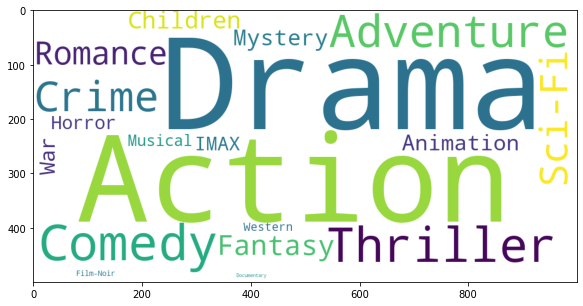

In [19]:
wc = WordCloud(background_color="white",width=1000,height=500, max_words=100,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict2)
plt.figure(figsize=(10,5))
plt.imshow(wc)